# Medical Appointment No Shows

### dalam projek ini akan membahas dan menganalisis Ketidakhadiran pasien ketika telah membuat janji medis/jadwal bertemu dokter. 

### Beberapa contoh kasus diantaranya:
- Seseorang telah membuat janji medis dan diberitahu semua persyaratan namun tidak datang di hari H. 
This dataset contains 110.527 medical appointments in Brazil and its 14 associated variables (characteristics). The most important one if the patient show-up or no-show to the appointment.

One of these variables is scholarship, and this variable refers to the concept of Bolsa Família. It is a social welfare program of the Government of Brazil. Bolsa Família provides financial aid to poor Brazilian families. The program attempts to both reduce short-term poverty by direct cash transfers and fight long-term poverty by increasing human capital among the poor through conditional cash transfers. It also works to give free education to children who cannot afford to go to school to show the importance of education. To find more, you can check this

In [3]:
# import library

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df= pd.read_csv('Med_appoinment.csv')
df.head(3)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,NoShow
0,2.990000e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.590000e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.260000e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No


In [18]:
# Ukuran dataframe memiliki 110.527 baris dan 14 kolom, sehingga untuk mengurangi beban executing dataframe dan mempermudah analisis, akan diambil 5000 data pertama.
df.shape

(5000, 14)

## A. EDA

In [19]:
# Slicing data to be only 5000 first rows
df = df.iloc[:5000, :]

In [20]:
df.info()
## ukuran dataframe sudah berupa 5000 entries dan 14 kolom

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   PatientId       5000 non-null   float64
 1   AppointmentID   5000 non-null   int64  
 2   Gender          5000 non-null   object 
 3   ScheduledDay    5000 non-null   object 
 4   AppointmentDay  5000 non-null   object 
 5   Age             5000 non-null   int64  
 6   Neighbourhood   5000 non-null   object 
 7   Scholarship     5000 non-null   int64  
 8   Hipertension    5000 non-null   int64  
 9   Diabetes        5000 non-null   int64  
 10  Alcoholism      5000 non-null   int64  
 11  Handcap         5000 non-null   int64  
 12  SMS_received    5000 non-null   int64  
 13  NoShow          5000 non-null   object 
dtypes: float64(1), int64(8), object(5)
memory usage: 547.0+ KB


In [21]:
# Mengecek nilai yang terduplikasi/non unique.
df.duplicated().sum()

0

In [22]:
# Checking the number of the unique values for each variable, such as Neighbourhood, Handcap, and so on.
df.nunique()

PatientId         2424
AppointmentID     5000
Gender               2
ScheduledDay      4899
AppointmentDay      20
Age                 95
Neighbourhood       78
Scholarship          2
Hipertension         2
Diabetes             2
Alcoholism           2
Handcap              4
SMS_received         2
NoShow               2
dtype: int64

In [23]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,5.000000e+03,5.000000e+03,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,1.495594e+14,5.616103e+06,37.300800,0.088600,0.185400,0.065000,0.028000,0.018000,0.384600
std,2.584962e+14,6.973119e+04,23.146574,0.284194,0.388661,0.246551,0.164989,0.147242,0.486549
min,9.380000e+04,5.030230e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.160000e+12,5.580300e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.880000e+13,5.632054e+06,38.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.482500e+13,5.642626e+06,56.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000e+15,5.754683e+06,98.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000


In [37]:
# Checking how much the data covers over the year
df.AppointmentDay.sort_values()[:5]

0       2016-04-29T00:00:00Z
2151    2016-04-29T00:00:00Z
2152    2016-04-29T00:00:00Z
2153    2016-04-29T00:00:00Z
2154    2016-04-29T00:00:00Z
Name: AppointmentDay, dtype: object

In [38]:
df.AppointmentDay.sort_values()[-5:]

4009    2016-05-31T00:00:00Z
3561    2016-05-31T00:00:00Z
3250    2016-05-31T00:00:00Z
3359    2016-05-31T00:00:00Z
4005    2016-05-31T00:00:00Z
Name: AppointmentDay, dtype: object

## Dataframe Issues:
1. Does age affect on people for showing up for their appointments? 
2. Which age segment is caring less/more about health?
### Machine Learning ini tidak akan menganalisis features (kolom) PatientId, AppointmentID, ScheduledDay, & AppointmentDay. 

In [ ]:
# df.groupby(["name"]).apply(lambda x: x.sort_values(["count_1"], ascending = False))
g = df_agg['count'].groupby('job', group_keys=False)
res = g.apply(lambda x: x.sort_values(ascending=False).head(3))

new_df = df.groupby(['user_ID','product_id'], sort=True).sum().reset_index()
new_df = new_df.sort_values(by = ['user_ID', 'amount'], ascending=[True,False])
print(new_df)

In [14]:
# Number of patients showing ups for each age
# df.groupby('Age').sum().sort_values(by='NoShow', ascending=False)
new_df = df.groupby(['Age']).sum()
new_df = new_df.apply(lambda x: x.sort_values(['NoShow'], ascending=False))



TypeError: unhashable type: 'list'

In [17]:
# Number of patients showing ups for each age
# df.groupby('Age').sum().sort_values(by='NoShow', ascending=False)
# df.groupby(['Age']).sum().apply(lambda x: x.sort_values(['NoShow'], ascending=False))
df.groupby('Age').sum()

# Number of showing ups for each age
# df_clean.groupby('Age').sum().Show.sort_values(ascending=False)

,PatientId,AppointmentID,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
Age,,,,,,,,
0,2.485277e+16,994393397,1,0,0,0,0,72
1,1.779054e+16,621734595,3,0,0,0,0,39
2,1.636405e+16,505489297,5,0,0,0,0,31
3,5.830601e+15,409172345,5,0,0,0,0,30
4,7.790484e+15,279836745,3,0,0,0,0,20
...,...,...,...,...,...,...,...,...
90,1.822776e+14,16989251,0,1,0,0,0,0
91,4.269324e+13,16830664,0,1,1,0,0,0
92,1.696000e+14,11379786,0,2,0,0,0,0


In [16]:
df['NoShow']

0       No
1       No
2       No
3       No
4       No
        ..
4995    No
4996    No
4997    No
4998    No
4999    No
Name: NoShow, Length: 5000, dtype: object

In [15]:
df['NoShow'].value_counts()

No     3941
Yes    1059
Name: NoShow, dtype: int64

In [51]:
def replacing(df):
    """
    Segment each age into an age segment started from 5 to 85 years
    and divided by 10 years.
    First segment is from 0 to 5 years.
    Last segment is from 85 to the max years old person.
    Each segment in between is within 10 years range.
    
    returns: df, a dataframe contains the age segments.
    """
    lower = 5
    upper = 15
    lower_2 = lower
    upper_2 = upper
    
    # Segment the age into multiple segments using integers first then replace 
    # the integers with their corresponding string segment.
    df.loc[df.Age <= 5, ['Age']] = 5
    while(1):
        df.loc[(lower < df.Age) & (df.Age <= upper), ['Age']] = upper
        lower += 10
        upper += 10
        if upper > 85:
            break
    df.loc[df.Age > 85, ['Age']] = int(df_clean.Age.max())
    
    
    # Creating a copy from the cleaned dataset to segment the age.
    df.loc[df.Age == 5, ['Age']] = '0 - 5'
    while(1):
        df.loc[df.Age == upper_2, ['Age']] = '{} - {}'.format(lower_2+1, upper_2)
        upper_2 += 10
        lower_2 += 10
        if upper_2 > 85:
            break
    df.loc[df.Age == int(df_clean.Age.max()), ['Age']] = '86 - {}'.format(df_clean.Age.max()) 
    
    return df

In [ ]:
# Creating a copy from the cleaned dataset to segment the age.
df_clean_segments = df_clean.copy()

df_clean_segments = replacing(df_clean_segments)

In [ ]:
df_clean_segments.groupby('Age').count()

In [ ]:
# Creating pandas series that contains the number of showing up(sum of 1s) for each age segment.
age_segments = df_clean_segments.groupby('Age').sum().Show.sort_values(ascending=False)

locations = np.arange(len(age_segments))
heights = list(age_segments)
labels = age_segments.index

f = plt.figure(figsize=(10, 7))

ax1 = f.add_subplot(1, 1, 1)
ax1.bar(locations, heights, tick_label=labels, color='k')
ax1.set_title("Number of Showing Up Times per Age Segments")
ax1.set_xlabel("Age Segments")
ax1.set_ylabel("Number of Showing Up Times")

In [ ]:
# Creating a copy from the cleaned dataset to segment the age.
df_clean_segments = df_clean.copy()

# Creating a function for ease of age segmentation in next sections.
def segmenting(df_clean_segments):
    # Segment the age into multiple segments using integers first then replace the integers with their corresponding segment.
    df_clean_segments.loc[df_clean_segments.Age <= 5, ['Age']] = 5 # '0-5'
    df_clean_segments.loc[(5 < df_clean_segments.Age) & (df_clean_segments.Age <= 15), ['Age']] = 15 #'6-15'
    df_clean_segments.loc[(15 < df_clean_segments.Age) & (df_clean_segments.Age <= 25), ['Age']] = 25 #'16-25'
    df_clean_segments.loc[(25 < df_clean_segments.Age) & (df_clean_segments.Age <= 40), ['Age']] = 40 #'26-40'
    df_clean_segments.loc[(40 < df_clean_segments.Age) & (df_clean_segments.Age <= 60), ['Age']] = 60 #'41-60'
    df_clean_segments.loc[(60 < df_clean_segments.Age) & (df_clean_segments.Age <= 80), ['Age']] = 80 #'61-80'
    df_clean_segments.loc[df_clean_segments.Age > 80, ['Age']] = int(df_clean.Age.max()) #'81-{}'.format(df_clean.Age.max())

    # Replace the integers with their corresponding segment.
    df_clean_segments.loc[df_clean_segments.Age == 5, ['Age']] = '0 - 5'
    df_clean_segments.loc[df_clean_segments.Age == 15, ['Age']] = '16 - 25'
    df_clean_segments.loc[df_clean_segments.Age == 25, ['Age']] = '6 - 15'
    df_clean_segments.loc[df_clean_segments.Age == 40, ['Age']] = '26 - 40'
    df_clean_segments.loc[df_clean_segments.Age == 60, ['Age']] = '41 - 60'
    df_clean_segments.loc[df_clean_segments.Age == 80, ['Age']] = '61 - 80'
    df_clean_segments.loc[df_clean_segments.Age == int(df_clean.Age.max()), ['Age']] = '81 - {}'.format(df_clean.Age.max())

segmenting(df_clean_segments)

In [ ]:
# Creating pandas series that contains the number of showing up(sum of 1s) for each age segment.
age_segments = df_clean_segments.groupby('Age').sum().Show.sort_values(ascending=False)

locations = np.arange(len(age_segments))
heights = list(age_segments)
labels = age_segments.index

f = plt.figure(figsize=(10, 7))

ax1 = f.add_subplot(1, 1, 1)
ax1.bar(locations, heights, tick_label=labels, color='k')
ax1.set_title("Number of Showing Up Times per Age Segments")
ax1.set_xlabel("Age Segments")
ax1.set_ylabel("Number of Showing Up Times")

In [ ]:
# Mengubah bentuk dataframe kedalam dummy variable untuk plot distribusi
# Hot encoding the gender column > Which means we should drop the rest columns for avoiding misconvinention,
# and focusing only on the columns that we're going to use.
one_hot_df_clean = pd.get_dummies(df_clean.drop(columns=['Neighbourhood', 'Scholarship', 'Hipertension',
                                                         'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received']))
one_hot_df_clean.head(5)

In [ ]:
# Creating a copy from the one hot encoded data to segment the age.
df_clean_segments = one_hot_df_clean.copy()

# Segment the age into multiple segments using the previous function
segmenting(df_clean_segments)

df_clean_segments[df_clean_segments.Show == 1].groupby('Age').sum()

In [ ]:
one_hot_df_clean_segments = df_clean_segments[df_clean_segments.Show == 1].groupby('Age').sum()

one_hot_df_clean_segments.drop(columns='Show').plot(figsize=(10,7))

### Which gender is commited more to their appointment, Male or Female?

In [ ]:
# Hot encoding the Show column > Which means we should drop the rest columns for avoiding misconvinention,
# and focusing only on the columns that we're going to use.
show_encoded = pd.get_dummies(df_clean.drop(columns=['Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
                                                     'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received']), 
                              columns=['Show'])

In [ ]:
# show_encoded
show_encoded.groupby('Gender').sum()

In [ ]:
## UNTUK MELIHAT PASIEN YANG HADIR DAN TIDAK DATANG SETELAH APPOINMENT
show_encoded.groupby('Gender').sum().T

In [ ]:
# Creating 2 pandas series for each Male and Female, and sorting the values as well.
show_percent_f = show_encoded.groupby('Gender').sum().T['F'].sort_values(ascending=False)
show_percent_m = show_encoded.groupby('Gender').sum().T['M'].sort_values(ascending=False)

sizes_f = list(show_percent_f)
sizes_m = list(show_percent_m)

# Changing the labels of the chart
labels = ['Shown', "Didn't Shown"]
colors = ['lightskyblue', 'lightcoral']
explode = (0.1, 0)  # explode 1st slice

f = plt.figure(figsize=(15, 7))

ax1 = f.add_subplot(1, 2, 1)
ax2 = f.add_subplot(1, 2, 2)

ax1.pie(sizes_f, labels=labels, colors=colors, explode=explode,
        autopct='%1.1f%%', shadow=True, startangle=140)
ax1.set_title("Percent of Females who shown & didn't show for appointments");
ax1.set_ylabel("Female Percentage")


ax2.pie(sizes_m, labels=labels, colors=colors, explode=explode,
        autopct='%1.1f%%', shadow=True, startangle=140)
ax2.set_title("Percent of Males who shown & didn't show for appointments")
ax2.set_ylabel("Male Percentage")

In [91]:
show_df_clean = df1.copy()
show_df_clean.loc[show_df_clean.NoShow == 1, ['NoShow']] = 'Shown'
show_df_clean.loc[show_df_clean.NoShow == 0, ['NoShow']] = "Didn't Shown"

In [92]:
show_df_clean.groupby('NoShow')['NoShow'].count().sort_values(ascending=False)

NoShow
Shown           3941
Didn't Shown    1059
Name: NoShow, dtype: int64

Text(0.5, 1.0, "Percentage of the People who shown and didn't show for their appointments")

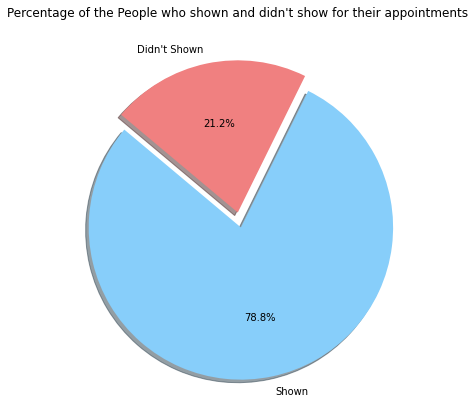

In [93]:
show_percent = show_df_clean.groupby('NoShow')['NoShow'].count().sort_values(ascending=False)

sizes = list(show_percent)
labels = show_percent.index
colors = ['lightskyblue', 'lightcoral']
explode = (0.1, 0)  # explode 1st slice

f = plt.figure(figsize=(10, 7))

ax1 = f.add_subplot(1, 1, 1)
ax1.pie(sizes, labels=labels, colors=colors, explode=explode,
        autopct='%1.1f%%', shadow=True, startangle=140)
ax1.set_title("Percentage of the People who shown and didn't show for their appointments")

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   PatientId       5000 non-null   float64
 1   AppointmentID   5000 non-null   int64  
 2   Gender          5000 non-null   object 
 3   ScheduledDay    5000 non-null   object 
 4   AppointmentDay  5000 non-null   object 
 5   Age             5000 non-null   int64  
 6   Neighbourhood   5000 non-null   object 
 7   Scholarship     5000 non-null   int64  
 8   Hipertension    5000 non-null   int64  
 9   Diabetes        5000 non-null   int64  
 10  Alcoholism      5000 non-null   int64  
 11  Handcap         5000 non-null   int64  
 12  SMS_received    5000 non-null   int64  
 13  NoShow          5000 non-null   object 
dtypes: float64(1), int64(8), object(5)
memory usage: 547.0+ KB


## B. DATA CLEANSING & PRE-PROCESSING

In [27]:
df1 = df.copy()
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   PatientId       5000 non-null   float64
 1   AppointmentID   5000 non-null   int64  
 2   Gender          5000 non-null   object 
 3   ScheduledDay    5000 non-null   object 
 4   AppointmentDay  5000 non-null   object 
 5   Age             5000 non-null   int64  
 6   Neighbourhood   5000 non-null   object 
 7   Scholarship     5000 non-null   int64  
 8   Hipertension    5000 non-null   int64  
 9   Diabetes        5000 non-null   int64  
 10  Alcoholism      5000 non-null   int64  
 11  Handcap         5000 non-null   int64  
 12  SMS_received    5000 non-null   int64  
 13  NoShow          5000 non-null   object 
dtypes: float64(1), int64(8), object(5)
memory usage: 547.0+ KB


## Hal yang harus dilakukan:
1. Dropping PatientId, AppointmentID, ScheduledDay, and AppointmentDay as we won't use them for analysis.
2. Replacing Yes (0) and No (1) just for clarity and avoiding misconveniention.

In [28]:
# 1. Dropping PatientId, AppointmentID, ScheduledDay, and AppointmentDay.
df1.drop(columns=['PatientId', 'AppointmentID', 'ScheduledDay', 'AppointmentDay'], inplace=True)

In [29]:
# 2. Replacing Yes by 0, and No by 1
df1.loc[df1['NoShow'] == 'Yes', ['NoShow']] = 0
df1.loc[df1['NoShow'] == 'No', ['NoShow']] = 1

In [30]:
df1

,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,NoShow
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,1
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,1
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,1
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,1
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
4995,F,58,JUCUTUQUARA,0,0,0,0,0,0,1
4996,M,69,CONQUISTA,0,0,0,0,0,0,1
4997,F,39,CENTRO,0,1,0,0,0,0,1
4998,F,61,FONTE GRANDE,0,1,0,0,0,0,1


In [31]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Gender         5000 non-null   object
 1   Age            5000 non-null   int64 
 2   Neighbourhood  5000 non-null   object
 3   Scholarship    5000 non-null   int64 
 4   Hipertension   5000 non-null   int64 
 5   Diabetes       5000 non-null   int64 
 6   Alcoholism     5000 non-null   int64 
 7   Handcap        5000 non-null   int64 
 8   SMS_received   5000 non-null   int64 
 9   NoShow         5000 non-null   object
dtypes: int64(7), object(3)
memory usage: 390.8+ KB


In [35]:
df1['NoShow'].value_counts()

1    3941
0    1059
Name: NoShow, dtype: int64

## Encoding scheme
###
-   Gender         : OneHot
-   Age            : -
-   Neighbourhood  : OneHotFill / Label Encoding / Binary
-   Scholarship    : - 
-   Hipertension   : -
-   Diabetes       : -
-   Alcoholism     : -
-   Handcap        : -
-   SMS_received   : -
-   NoShow         : TARGET

In [87]:
df1['Neighbourhood'].value_counts()

RESISTÊNCIA          719
MARIA ORTIZ          527
JARDIM DA PENHA      158
CENTRO               152
JARDIM CAMBURI       142
                    ... 
SEGURANÇA DO LAR       4
MORADA DE CAMBURI      4
ILHA DO BOI            3
PONTAL DE CAMBURI      1
ILHA DO FRADE          1
Name: Neighbourhood, Length: 78, dtype: int64

In [ ]:
# Encode features
df1['Neighbourhood'] = LabelEncoder.fit_transform(df1['Neighbourhood'])
df1['Gender'] = LabelEncoder.fit_transform(df1['Gender'])

In [ ]:
#  Pipeline digunakan untuk menyatukan beberapa step sehingga Cross-Validation akan tetap bisa berjalan saat beberapa parameter diubah serta menghindari data/information leakage dan output diluar target processing.

# from sklearn.impute import SimpleImputer

onehot_fill=Pipeline([
#     ('fillna',SimpleImputer(strategy='most_frequent')),
#     ('encode',OneHotEncoder(drop='first'))
# ])

transformer= ColumnTransformer([('one_hot',OneHotEncoder(drop='first'),['Gender', 'Neighbourhood'])
], remainder='passthrough')

In [ ]:
transformer.transformers

In [ ]:
transformer.fit_transform(df1)

### Data hasil encoding sudah berupa 0 dan 1.

## C. MODEL BENCHMARK & EVALUATION METRIC

In [ ]:
## DATA SPLITTING
X = df1.drop(columns = ['NoShow'])
y = df1[['NoShow']]

In [ ]:
# Pertama-tama, akan dilakukan splitting data untuk mencegah adanya data leakage.
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.15)

In [ ]:
x_train.head()

In [ ]:
### selanjutnya akan dilakukan cross validation untuk memilih model benchmark.
### Digunakan 3 jenis model ML, yaitu:

1. Random Forest: model ini menggunakan basis decision tree dan termasuk ke dalam ensemble model. Model ini menggabungkan banyak decision tree ke dalam satu model dengan tujuan untuk meningkatkan akurasi prediksi

2. Logistic Regression: model yang menggunakan basis linear regression untuk mengatasi masalah klasifikasi. Bedanya, hasil perhitungan formulanya akan dimasukkan ke dalam interval kelas 0 dan 1.

3. Decision Tree: model yang bekerja dengan cara splitting node menjadi 2 atau lebih sub-nodes.

### 1. RANDOM FOREST CLASSIFIER

In [ ]:
from sklearn.ensemble import RandomForestClassifier
param_grid = {
                'n_estimators':[5,7,10],
                'criterion':['gini','entropy'],
                'n_jobs':[-1], # -1 indicates the processing in parallel using all CPUs
                'max_features':['auto','log2',None] 
}

In [ ]:
RFC_grid = GridSearchCV(RandomForestClassifier(), param_grid, refit = True, verbose = 3)
RFC_grid.fit(x_train, y_train) 

print(RFC_grid.best_params_) 
print(RFC_grid.best_estimator_)

In [ ]:
RFC = RandomForestClassifier(n_estimators = RFC_grid.best_params_['n_estimators'],
                             criterion = RFC_grid.best_params_['criterion'],
                             max_features = RFC_grid.best_params_['max_features'],
                             n_jobs = RFC_grid.best_params_['n_jobs'])
RFC.fit(x_train, y_train)

In [ ]:
RFC_y_pred = RFC.predict(x_test)
RFC_accuracy = accuracy_score(RFC_y_pred,y_test)
RFC_recall = recall_score(RFC_y_pred,y_test)
RFC_precision = precision_score(RFC_y_pred,y_test)
print(classification_report(RFC_y_pred,y_test))
print('Confusion Matrix:\n',confusion_matrix(RFC_y_pred,y_test))

In [ ]:
### DARI HASIL INI DAPAT DILIHAT BAHWA RECALL (FALSE NEGATIVE) ,MEMILIKI NILAI TERTINGGI DIBANDINGKAN PRECISION DAN F1-SCORE.
### Hal ini menyimpulkan bahwa model memprediksi customer akan muncul ketika telah membuat appoinment dari setiap data historis appoinment pasien, tapi realisasinya adalah customer tidak datang/ No-Show. 

### 2. LOGISTIC REGRESSION

In [ ]:
lr = LogisticRegression(random_state=10,max_iter=200)
lr.fit(x_train,y_train)

In [ ]:
lr_y_pred = lr.predict(x_test)
lr_accuracy = accuracy_score(lr_y_pred,y_test)
lr_recall = recall_score(lr_y_pred,y_test)
lr_precision = precision_score(lr_y_pred,y_test)
print(classification_report(lr_y_pred,y_test))
print('Confusion Matrix:\n',confusion_matrix(lr_y_pred,y_test))

### 3. DECISION TREE CLASSIFIER

In [ ]:
DTC = DecisionTreeClassifier(random_state=10)
DTC.fit(x_train,y_train)

In [ ]:
DTC_y_pred = DTC.predict(x_test)
DTC_accuracy = accuracy_score(DTC_y_pred,y_test)
DTC_recall = recall_score(DTC_y_pred,y_test)
DTC_precision = precision_score(DTC_y_pred,y_test)
print(classification_report(DTC_y_pred,y_test))
print('Confusion Matrix:\n',confusion_matrix(DTC_y_pred,y_test))

## D. MODEL IMPROVEMENT & HYPERPARAMETER TUNING

In [ ]:
model = RandomForestClassifier()

estimator_rf = Pipeline([('transformer', transformer), ('model', model)])
estimator_rf.fit(x_train, y_train)

y_pred = estimator_rf.predict(x_test)
print(classification_report(y_test, y_pred))

In [ ]:
f, ax = plt.subplots(figsize=(8, 5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='.0f', ax=ax)
plt.xlabel('y Prediksi')
plt.ylabel('y Aktual')
plt.show()